## EDA, Preprocessing & Vectorization

### Setup

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
from collections import Counter
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

## Product Reviews

In [3]:
product_reviews = pd.read_csv('/content/drive/MyDrive/AuthentiFeel/processed_data/product_reviews.csv')

### Preprocessing

In [4]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
import string
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np
import random
from sklearn.preprocessing import normalize

In [5]:
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [6]:
def preprocess_text(doc):
    tokens = nltk.word_tokenize(doc.lower())
    tokens = [word for word in tokens if word not in stopwords.words('english') and word not in string.punctuation]
    #tokens = [stemmer.stem(word) for word in tokens]
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    return ' '.join(tokens)

In [7]:
lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer()
data = product_reviews['review_text'].to_list()
target = product_reviews['positive_or_not'].to_list()
preprocessed_data = [preprocess_text(doc) for doc in data]

In [8]:
preprocessed_data[1]

'dr. oz accomplished heart surgeon field cardiac transplantation describes combine complementary medicine e.g hypnosis reflexology yoga message acupuncture etc orthodox western medicine excellent forward dr dean ornish interesting epilogue containing overview complementary medicine technique bulk book contains story patient dr. oz treated using revolutionary way cardiologist great interest combining western medicine complementary medicine reason bought book however book bit boring read also bit disappointment nevertheless interested new medicine think medicine new millennium want read book'

In [9]:
df=pd.DataFrame()
df['reviews']=preprocessed_data
df['positive_or_not']=target

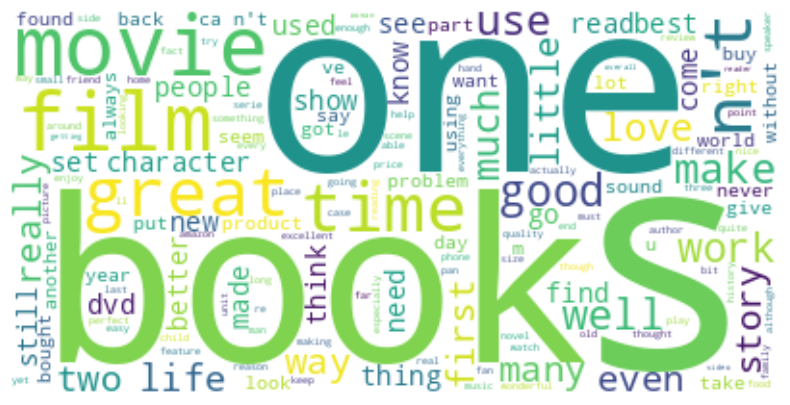

In [10]:
positive_reviews = df[df['positive_or_not'] == 1]

# Concatenate all positive reviews into a single string
positive_text = " ".join(review for review in positive_reviews.reviews)

# Generate a word cloud image
wordcloud = WordCloud(background_color='white', max_words=200, contour_width=3, contour_color='steelblue').generate(positive_text)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Hide the axes
plt.show()

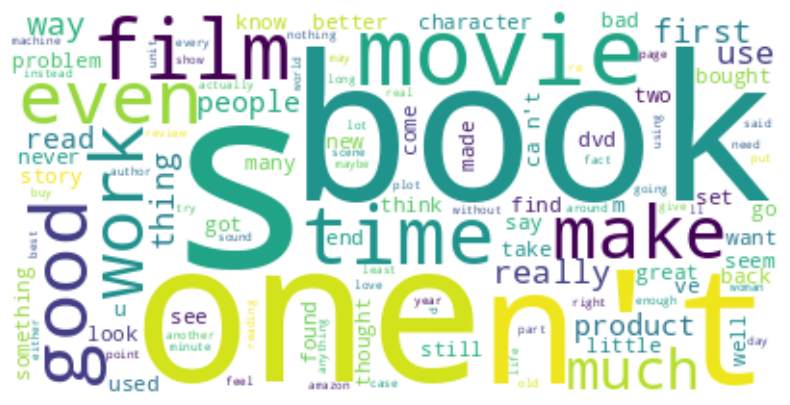

In [11]:
negative_reviews = df[df['positive_or_not'] == 0]

# Concatenate all positive reviews into a single string
negative_text = " ".join(review for review in negative_reviews.reviews)

# Generate a word cloud image
wordcloud = WordCloud(background_color='white', max_words=200, contour_width=3, contour_color='steelblue').generate(negative_text)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Hide the axes
plt.show()

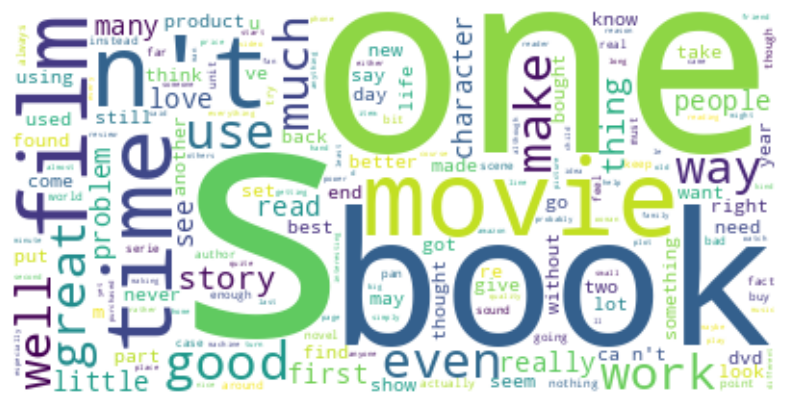

In [13]:
text = " ".join(review for review in df.reviews)

# Generate a word cloud image
wordcloud = WordCloud(background_color='white', max_words=200, contour_width=3, contour_color='steelblue').generate(text)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Hide the axes
plt.show()

## Fake Reviews

In [14]:
fake_reviews = pd.read_csv('/content/drive/MyDrive/AuthentiFeel/processed_data/fake_reviews.csv')

In [15]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
import string
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np
import random
from sklearn.preprocessing import normalize

In [16]:
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [17]:
def preprocess_text(doc):
    tokens = nltk.word_tokenize(doc.lower())
    tokens = [word for word in tokens if word not in stopwords.words('english') and word not in string.punctuation]
    #tokens = [stemmer.stem(word) for word in tokens]
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    return ' '.join(tokens)

In [18]:
lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer()
data = fake_reviews['text_'].to_list()
target = fake_reviews['label'].to_list()
preprocessed_data = [preprocess_text(doc) for doc in data]

In [19]:
preprocessed_data[1]

"love great upgrade original 've mine couple year"

In [22]:
df=pd.DataFrame()
df['reviews']=preprocessed_data
df['label']=target

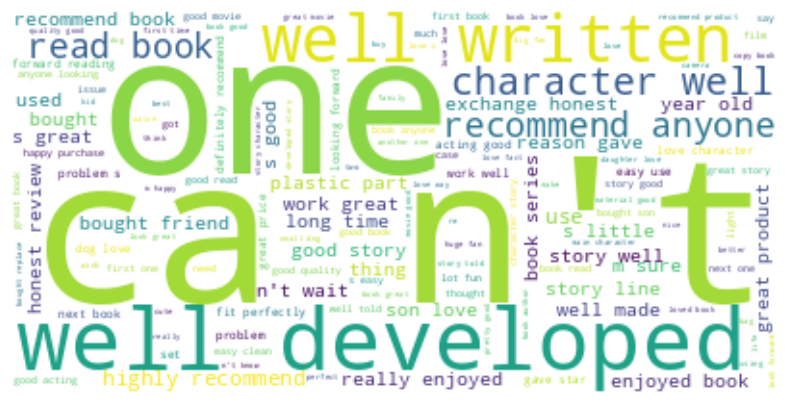

In [23]:
computer_generated_reviews = df[df['label'] == 'CG']

# Concatenate all positive reviews into a single string
computer_generated_text = " ".join(review for review in computer_generated_reviews.reviews)

# Generate a word cloud image
wordcloud = WordCloud(background_color='white', max_words=200, contour_width=3, contour_color='steelblue').generate(computer_generated_text)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Hide the axes
plt.show()

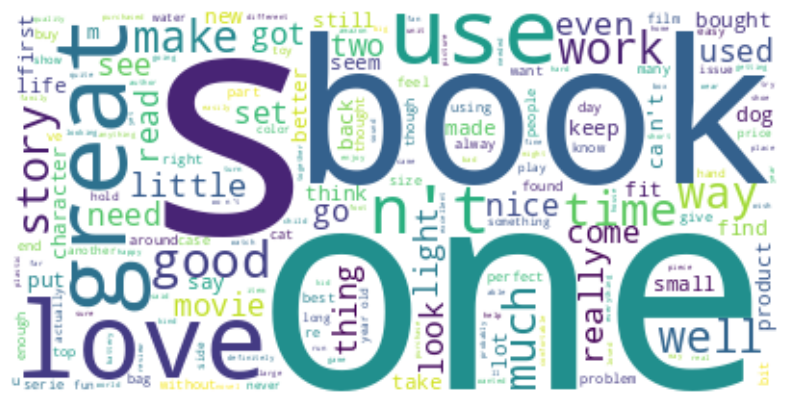

In [24]:
orginal_reviews = df[df['label'] == 'OR']

# Concatenate all positive reviews into a single string
orginal_text = " ".join(review for review in orginal_reviews.reviews)

# Generate a word cloud image
wordcloud = WordCloud(background_color='white', max_words=200, contour_width=3, contour_color='steelblue').generate(orginal_text)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Hide the axes
plt.show()

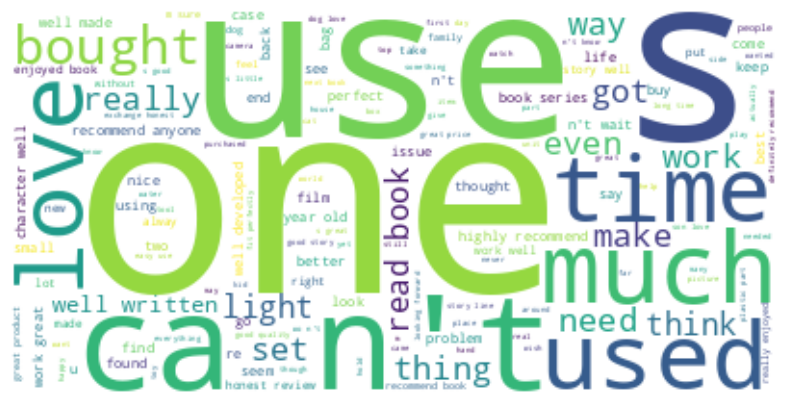

In [25]:
text = " ".join(review for review in df.reviews)

# Generate a word cloud image
wordcloud = WordCloud(background_color='white', max_words=200, contour_width=3, contour_color='steelblue').generate(text)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Hide the axes
plt.show()